# Kallisto Quantification Analysis

In [1]:
import pandas as pd
import os

### Get abundances

In [60]:
#Get files with abundance
samples = os.listdir('../output/')
df = pd.DataFrame()
for sample in samples:
    try:
        df1 = pd.read_csv('../output/'+sample+'/abundance.tsv',sep='\t')
        df1['sample'] = sample
        df = pd.concat([df,df1],ignore_index=True)
    except:
        next
df

,target_id,length,eff_length,est_counts,tpm,sample
0,ENST00000631435.1,12,13.0000,0.0,0.000000,PDX156
1,ENST00000434970.2,9,10.0000,0.0,0.000000,PDX156
2,ENST00000448914.1,13,14.0000,0.0,0.000000,PDX156
3,ENST00000415118.1,8,9.0000,0.0,0.000000,PDX156
4,ENST00000632684.1,12,13.0000,0.0,0.000000,PDX156
...,...,...,...,...,...,...
943760,ENST00000639790.1,1370,1186.5200,0.0,0.000000,PDX302
943761,ENST00000639660.1,284,117.2000,0.0,0.000000,PDX302
943762,ENST00000643577.1,105,14.6756,0.0,0.000000,PDX302
943763,ENST00000646356.1,900,716.5220,0.0,0.000000,PDX302


In [61]:
len(df.groupby('sample').count()) # abundances from all 5 samples

5

### Get gene names

In [62]:
annot_df = pd.read_csv('data/ens_transcript_symbol.tsv',sep='\t')
annot_df

,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000387314,ENST00000387314.1,MT-TF
1,ENST00000389680,ENST00000389680.2,MT-RNR1
2,ENST00000387342,ENST00000387342.1,MT-TV
3,ENST00000387347,ENST00000387347.2,MT-RNR2
4,ENST00000386347,ENST00000386347.1,MT-TL1
...,...,...,...
256178,ENST00000355360,ENST00000355360.8,PGBD2
256179,ENST00000329291,ENST00000329291.6,PGBD2
256180,ENST00000462488,ENST00000462488.1,PGBD2
256181,ENST00000363625,ENST00000363625.1,RNU6-1205P


In [63]:
# annot_df = annot_df.rename(columns={'Transcript stable ID':'target_id'})
df['Transcript stable ID'] = df['target_id'].str.split('.',expand=True)[0]
df = pd.merge(df,annot_df,how='left')
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000631435.1,12,13.0000,0.0,0.000000,PDX156,ENST00000631435,ENST00000631435.1,TRBD1
1,ENST00000434970.2,9,10.0000,0.0,0.000000,PDX156,ENST00000434970,ENST00000434970.2,TRDD2
2,ENST00000448914.1,13,14.0000,0.0,0.000000,PDX156,ENST00000448914,ENST00000448914.1,TRDD3
3,ENST00000415118.1,8,9.0000,0.0,0.000000,PDX156,ENST00000415118,ENST00000415118.1,TRDD1
4,ENST00000632684.1,12,13.0000,0.0,0.000000,PDX156,ENST00000632684,ENST00000632684.1,TRBD1
...,...,...,...,...,...,...,...,...,...
943760,ENST00000639790.1,1370,1186.5200,0.0,0.000000,PDX302,ENST00000639790,ENST00000639790.1,LILRP1
943761,ENST00000639660.1,284,117.2000,0.0,0.000000,PDX302,ENST00000639660,ENST00000639660.1,AC245128.19
943762,ENST00000643577.1,105,14.6756,0.0,0.000000,PDX302,ENST00000643577,NaN,NaN
943763,ENST00000646356.1,900,716.5220,0.0,0.000000,PDX302,ENST00000646356,NaN,NaN


In [64]:
ids_not_found = df['Transcript stable ID'][df['Gene name'].isnull()].tolist()
ids_not_found = [ids.split('.')[0] for ids in ids_not_found]
len(ids_not_found)

10525

### Get sample names

In [65]:
fgfrs = ['FGFR1','FGFR2','FGFR3','FGFR4']

In [66]:
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000631435.1,12,13.0000,0.0,0.000000,PDX156,ENST00000631435,ENST00000631435.1,TRBD1
1,ENST00000434970.2,9,10.0000,0.0,0.000000,PDX156,ENST00000434970,ENST00000434970.2,TRDD2
2,ENST00000448914.1,13,14.0000,0.0,0.000000,PDX156,ENST00000448914,ENST00000448914.1,TRDD3
3,ENST00000415118.1,8,9.0000,0.0,0.000000,PDX156,ENST00000415118,ENST00000415118.1,TRDD1
4,ENST00000632684.1,12,13.0000,0.0,0.000000,PDX156,ENST00000632684,ENST00000632684.1,TRBD1
...,...,...,...,...,...,...,...,...,...
943760,ENST00000639790.1,1370,1186.5200,0.0,0.000000,PDX302,ENST00000639790,ENST00000639790.1,LILRP1
943761,ENST00000639660.1,284,117.2000,0.0,0.000000,PDX302,ENST00000639660,ENST00000639660.1,AC245128.19
943762,ENST00000643577.1,105,14.6756,0.0,0.000000,PDX302,ENST00000643577,NaN,NaN
943763,ENST00000646356.1,900,716.5220,0.0,0.000000,PDX302,ENST00000646356,NaN,NaN


In [67]:
#PDX156
df[['Gene name','est_counts','tpm']][(df['sample']=='PDX156')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,1708.3400,28.439300
FGFR2,552.3910,6.869560
FGFR3,44.4833,0.486627
FGFR4,107.2660,1.801080


In [68]:
#PDX288
df[['Gene name','est_counts','tpm']][(df['sample']=='PDX288')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,35.6846,2.55152
FGFR2,53.3375,1.42005
FGFR3,166.5230,3.91074
FGFR4,19.0771,1.16907


In [69]:
#PDX296
df[['Gene name','est_counts','tpm']][(df['sample']=='PDX296')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,577.0100,36.632200
FGFR2,19.3420,0.640747
FGFR3,14.6114,0.552087
FGFR4,27.0415,1.339370


In [70]:
#PDX291B
df[['Gene name','est_counts','tpm']][(df['sample']=='PDX291B')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,122.220,1.86129
FGFR2,884.021,8.31593
FGFR3,492.663,4.08097
FGFR4,451.256,5.28317


In [71]:
#PDX302
df[['Gene name','est_counts','tpm']][(df['sample']=='PDX302')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,468.444,14.002900
FGFR2,1569.510,20.670400
FGFR3,41.204,0.411793
FGFR4,203.312,2.839360


### Check FGFR1,2,3,4 accross samples

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(fgfrs)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_fgfr_df = pd.DataFrame({'Gene name':['FGFR1','FGFR2','FGFR3','FGFR4']})
for sample in samples:
    sample_df = fgfr_df[fgfr_df['sample']==sample]
    sample_df = sample_df.rename(columns={'tpm':sample})
    sample_df.drop(columns='sample',inplace=True)
    sample_df = sample_df[['Gene name',sample]]
    matrix_fgfr_df = pd.merge(matrix_fgfr_df,sample_df,how='left')
matrix_fgfr_df = matrix_fgfr_df.set_index('Gene name')
matrix_fgfr_df

,PDX156,PDX291B,PDX296,PDX302,PDX288
Gene name,,,,,
FGFR1,28.439300,1.86129,36.632200,14.002900,2.55152
FGFR2,6.869560,8.31593,0.640747,20.670400,1.42005
FGFR3,0.486627,4.08097,0.552087,0.411793,3.91074
FGFR4,1.801080,5.28317,1.339370,2.839360,1.16907


In [74]:
samples

['PDX156', 'PDX291B', 'PDX296', 'PDX302', 'PDX288']

In [75]:
#sort samples by response
samples_by_resp = ['PDX156','PDX302','PDX296','PDX288','PDX291B']


In [76]:
len(samples_by_resp)

5

Text(0.5, 1.0, 'FGFR2')

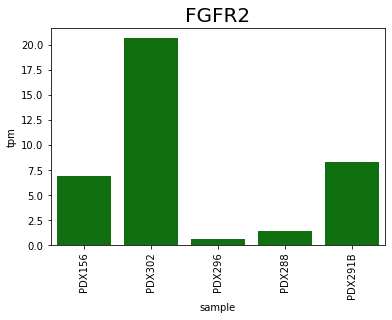

In [77]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR2']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR2',size=20)

Text(0.5, 1.0, 'FGFR1')

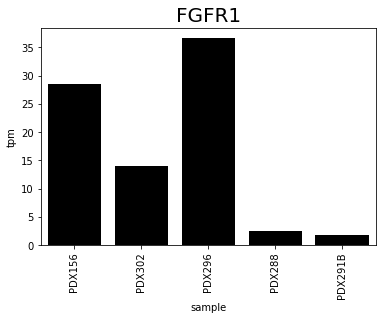

In [78]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR1']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='black')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR1',size=20)

Text(0.5, 1.0, 'FGFR3')

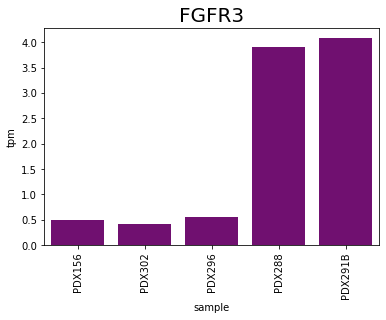

In [79]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR3']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='purple')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3',size=20)

Text(0.5, 1.0, 'FGFR4')

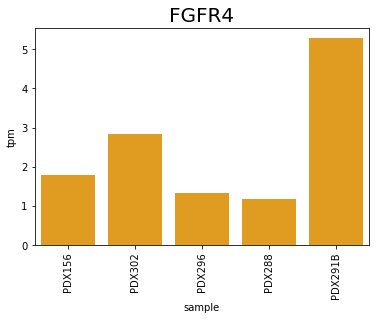

In [80]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR4']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='orange')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR4',size=20)

In [112]:
def heatmap (matrix,x=2,y=8,cmap='Reds',norm=False):
    
    matrix = matrix.reindex(columns=samples_by_resp)
    
    if norm == True:
        matrix = matrix.div(matrix.max(axis=1), axis=0)
    plt.figure(figsize=(x,y))
    sns.heatmap(matrix,cmap=cmap,linewidths=1,linecolor='white')
    
    plt.text(x=1.8,y=-1,s='NON-RESP')
    plt.text(x=4.4,y=-1,s='RESP')
    plt.text(x=0,y=-0.7,s='_______________________________________________________________________')
    plt.text(x=4.1,y=-0.7,s='_______________')

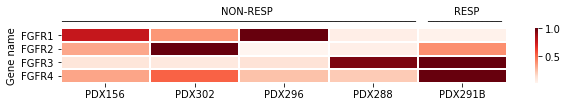

In [113]:
heatmap(matrix_fgfr_df,x=10,y=1,norm=True) #normalised colors by row (gene)

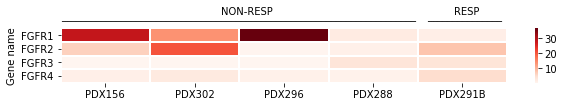

In [115]:
heatmap(matrix_fgfr_df,x=10,y=1) #not normalized

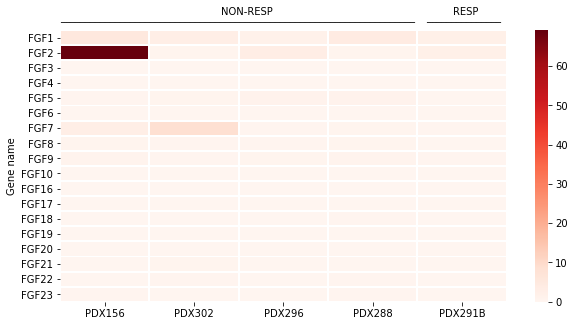

In [117]:
fgfs = ['FGF1','FGF2','FGF3','FGF4','FGF5','FGF6','FGF7','FGF8','FGF9','FGF10',
        'FGF16','FGF17','FGF18','FGF19','FGF20','FGF21','FGF22','FGF23']
#PDX325
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(fgfs)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':fgfs})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=10,y=5) #not normalized

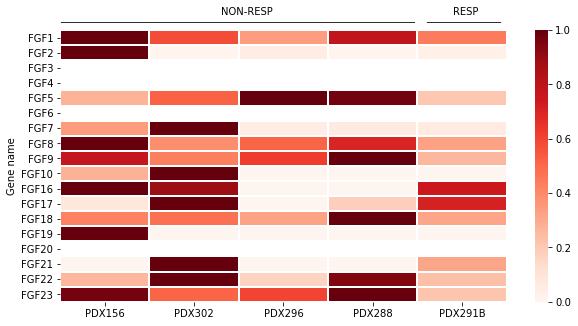

In [118]:
heatmap(matrix_df,x=10,y=5,norm=True) #not normalized

### Check all counts (quality of the sample)

[Text(0, 0, 'PDX156'),
 Text(1, 0, 'PDX288'),
 Text(2, 0, 'PDX291B'),
 Text(3, 0, 'PDX296'),
 Text(4, 0, 'PDX302')]

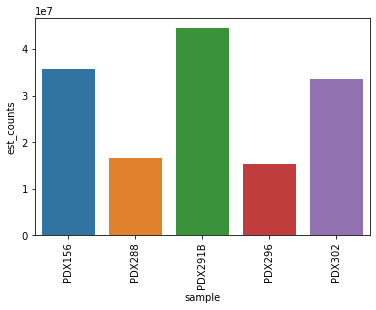

In [119]:
all_counts_df = df.groupby('sample',as_index=False).sum()
all_counts_df[['tpm']]
g = sns.barplot(x=all_counts_df['sample'],y=all_counts_df['est_counts'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

## TF analysis

In [120]:
gh_df = pd.read_excel('data/GeneHancer_version_4-4.xlsx')
gh_df

,chrom,source,feature name,start,end,score,strand,frame,attributes
0,chr2,GeneHancer,Enhancer,70017801,70018000,0.52,.,.,genehancer_id=GH02F070017;connected_gene=PCBP1...
1,chr18,GeneHancer,Enhancer,48592690,48592839,0.96,.,.,genehancer_id=GH18F048592;connected_gene=ENSG0...
2,chr5,GeneHancer,Enhancer,168312357,168319217,1.77,.,.,genehancer_id=GH05F168312;connected_gene=WWC1;...
3,chr12,GeneHancer,Enhancer,47204578,47219611,1.28,.,.,genehancer_id=GH12F047204;connected_gene=RPAP3...
4,chr21,GeneHancer,Enhancer,39630072,39635066,1.29,.,.,genehancer_id=GH21F039630;connected_gene=B3GAL...
...,...,...,...,...,...,...,...,...,...
218112,chr10,GeneHancer,Enhancer,44334083,44335821,0.71,.,.,genehancer_id=GH10F044334;connected_gene=LOC10...
218113,chr9,GeneHancer,Enhancer,80873797,80874459,0.25,.,.,genehancer_id=GH09F080873;connected_gene=LOC10...
218114,chr9,GeneHancer,Enhancer,98305468,98307965,0.59,.,.,genehancer_id=GH09F098305;connected_gene=TBC1D...
218115,chr20,GeneHancer,Enhancer,5602988,5606828,0.65,.,.,genehancer_id=GH20F005602;connected_gene=LOC64...


In [64]:
attributes = gh_df['attributes'].tolist()
attributes[0]

'genehancer_id=GH02F070017;connected_gene=PCBP1-AS1;score=12.90;connected_gene=ASPRV1;score=11.69;connected_gene=PIR47967;score=0.29;connected_gene=RN7SL470P;score=0.20'

In [60]:
gh_df['gh_id'] = gh_df['attributes'].str.split(';',expand=True)[0].str.split('=',expand=True)[1]
gh_df['gene'] = gh_df['attributes'].str.split(';',expand=True)[1].str.split('=',expand=True)[1]
gh_df = gh_df[['gh_id','gene','score']]
gh_df

,gh_id,gene,score
0,GH02F070017,PCBP1-AS1,0.52
1,GH18F048592,ENSG00000278983,0.96
2,GH05F168312,WWC1,1.77
3,GH12F047204,RPAP3,1.28
4,GH21F039630,B3GALT5-AS1,1.29
...,...,...,...
218112,GH10F044334,LOC101929465,0.71
218113,GH09F080873,LOC105376105,0.25
218114,GH09F098305,TBC1D2,0.59
218115,GH20F005602,LOC643406,0.65


In [61]:
gh_df[gh_df['gene']=='FGFR2']

,gh_id,gene,score
3984,GH10F121528,FGFR2,0.52
7614,GH10F121157,FGFR2,1.29
33936,GH10F121459,FGFR2,1.35
37367,GH10F121595,FGFR2,0.56
37442,GH10F121574,FGFR2,0.25
55785,GH10F121535,FGFR2,0.25
60386,GH10F121509,FGFR2,0.32
82035,GH10F121526,FGFR2,0.25
92318,GH10F121540,FGFR2,0.46
98147,GH10F121527,FGFR2,0.38


In [62]:
gh_df[gh_df['gene']=='FGFR3']

,gh_id,gene,score
66206,GH04F001970,FGFR3,0.62
85041,GH04F001792,FGFR3,0.97
183323,GH04F001785,FGFR3,0.25
211825,GH04F001784,FGFR3,0.46


In [121]:
with open('data/tf_FGFR2.txt') as f:
    tf_fgfr2 = f.read().splitlines()
tf_fgfr2

['HNRNPL',
 'TEAD4',
 'PRDM10',
 'ZNF629',
 'RFX1',
 'KDM1A',
 'ZNF692',
 'PRDM1',
 'ZIC2',
 'ZSCAN4',
 'PATZ1',
 'CTCF',
 'ZNF501',
 'POLR2A',
 'ZNF600',
 'ZNF341',
 'ZNF37A',
 'ZFX',
 'CEBPA',
 'ZNF561',
 'ARNT',
 'NONO',
 'KLF9',
 'ZBTB20',
 'SP2',
 'RAD21',
 'ZNF524',
 'ZXDB',
 'CTBP1',
 'ZBTB10',
 'BMI1',
 'RNF2',
 'ZNF580',
 'BCL11A',
 'ZBTB48',
 'ZBTB26',
 'ZBTB17',
 'YY1',
 'SCRT1',
 'TFDP1',
 'FOXM1',
 'ZFHX2',
 'KLF8',
 'ZNF777',
 'ZNF189',
 'ELF1',
 'ZNF335',
 'ZNF610',
 'GABPB1',
 'ZFP69B',
 'ETS1',
 'SKIL',
 'KLF17',
 'ZNF768',
 'HIC1',
 'ZSCAN5A',
 'SIN3A',
 'CEBPB',
 'SMAD4',
 'BCL6',
 'PAX8',
 'ZNF366',
 'VEZF1',
 'NRF1',
 'ZNF324',
 'MAFK',
 'ZNF660',
 'GLIS1',
 'TRIM28',
 'ZNF398',
 'ZNF2',
 'ZNF143',
 'KLF10',
 'KLF16',
 'SP3',
 'ZMYM3',
 'TAF1',
 'NANOG',
 'GTF2F1',
 'TBP',
 'RB1',
 'NFYC',
 'EGR2',
 'L3MBTL2',
 'RBPJ',
 'SP1',
 'ZNF362',
 'ELF3',
 'POU5F1',
 'EGR1',
 'CEBPG',
 'MZF1',
 'SP7',
 'ZBTB7A',
 'JUND',
 'EZH2',
 'GLIS2',
 'ZBTB8A',
 'PKNOX1',
 'ZEB2']

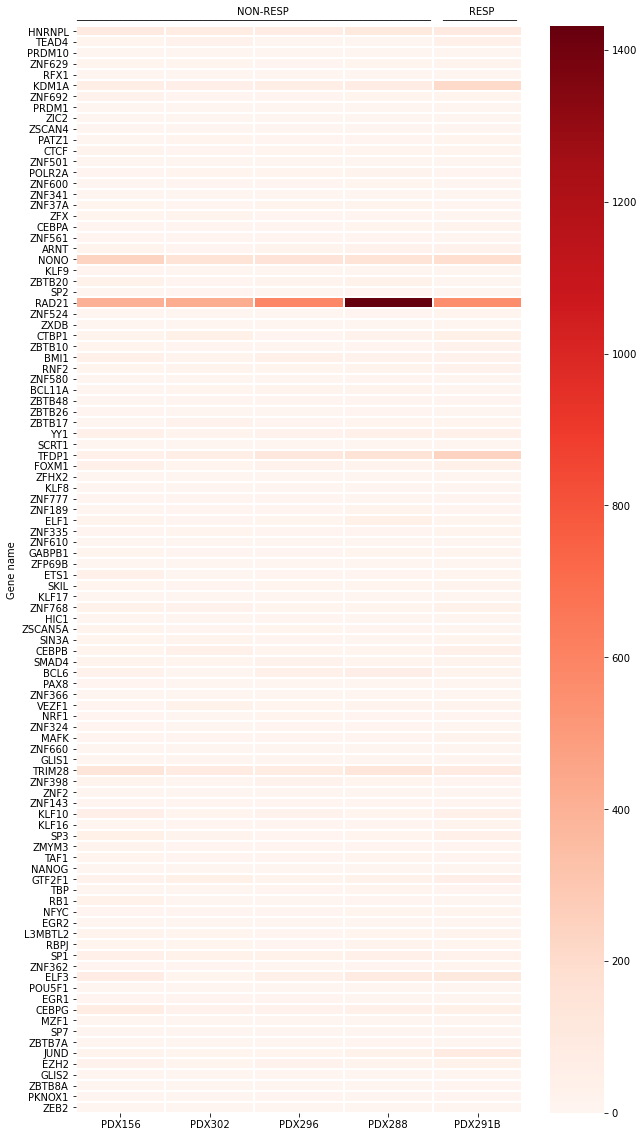

In [122]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr2)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr2})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=10,y=20) #not normalized

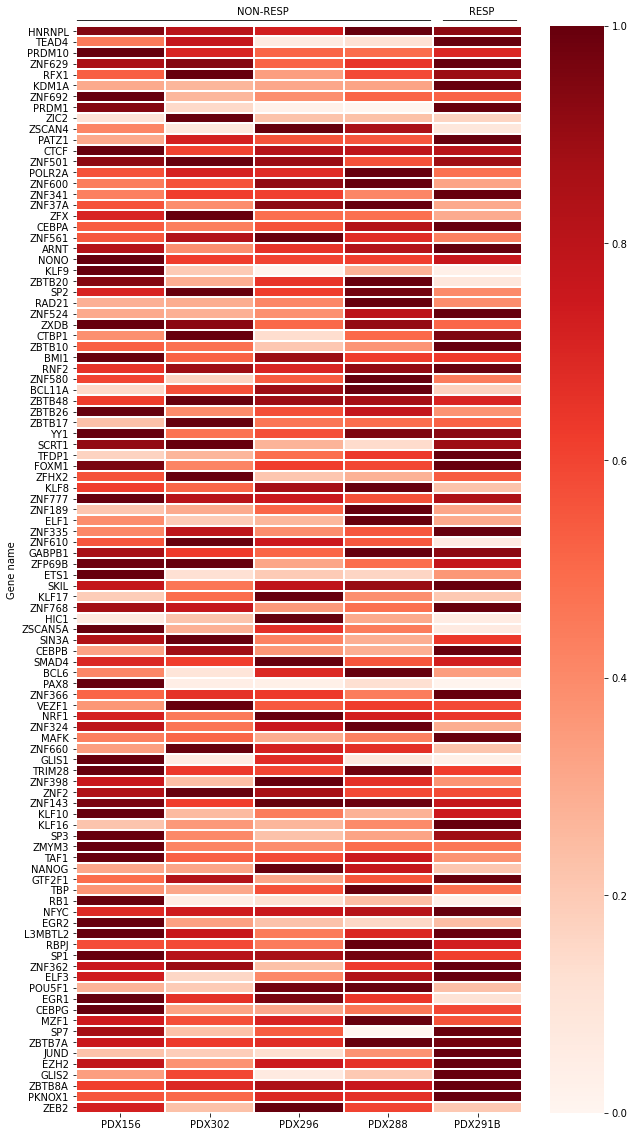

In [123]:
heatmap(matrix_df,x=10,y=20,norm=True) #not normalized

In [124]:
with open('data/tf_FGFR3.txt') as f:
    tf_fgfr3 = f.read().splitlines()
tf_fgfr3

['HNRNPL',
 'GATAD2A',
 'TEAD4',
 'SOX13',
 'KDM1A',
 'FOXA1',
 'MTA2',
 'ZIC2',
 'RBFOX2',
 'RXRB',
 'PATZ1',
 'IRF2',
 'SP1',
 'POLR2A',
 'EZH2',
 'GABPA',
 'ZNF37A',
 'ZFX',
 'GATAD2B',
 'CEBPA',
 'ZNF561',
 'SCRT2',
 'ARNT',
 'RFX3',
 'NONO',
 'ZBTB20',
 'ETS1',
 'SP2',
 'TCF7',
 'UBTF',
 'EGR1',
 'CTBP1',
 'ZBTB26',
 'ZBTB2',
 'ZKSCAN8',
 'TGIF2',
 'U2AF2',
 'BCL11A',
 'KAT7',
 'ZBTB48',
 'YY1',
 'KLF4',
 'CHD2',
 'EP300',
 'MAX',
 'ZBTB25',
 'MYC',
 'ZNF205',
 'TEAD1',
 'ZNF423',
 'RBM22',
 'TARDBP',
 'TFDP1',
 'KDM6A',
 'PCBP1',
 'CREM',
 'NR2F2',
 'MBD2',
 'KLF9',
 'FOXM1',
 'ZFHX2',
 'KLF8',
 'HNRNPH1',
 'ZNF792',
 'SAP130',
 'TBP',
 'ZNF335',
 'MIER3',
 'GABPB1',
 'KLF6',
 'ZGPAT',
 'ZNF384',
 'ZFP69B',
 'SAFB',
 'GATAD1',
 'DRAP1',
 'FOSL2',
 'HIC1',
 'SIN3B',
 'SMAD5',
 'SMAD4',
 'CEBPB',
 'BCL6',
 'TFAP4',
 'HNF4A',
 'SIN3A',
 'CHD4',
 'VEZF1',
 'ZFP64',
 'NFIL3',
 'BCL11B',
 'IKZF5',
 'PAF1',
 'RXRA',
 'NRF1',
 'THAP11',
 'ZNF3',
 'RARA',
 'NFIA',
 'DMAP1',
 'GLIS1',
 'TH

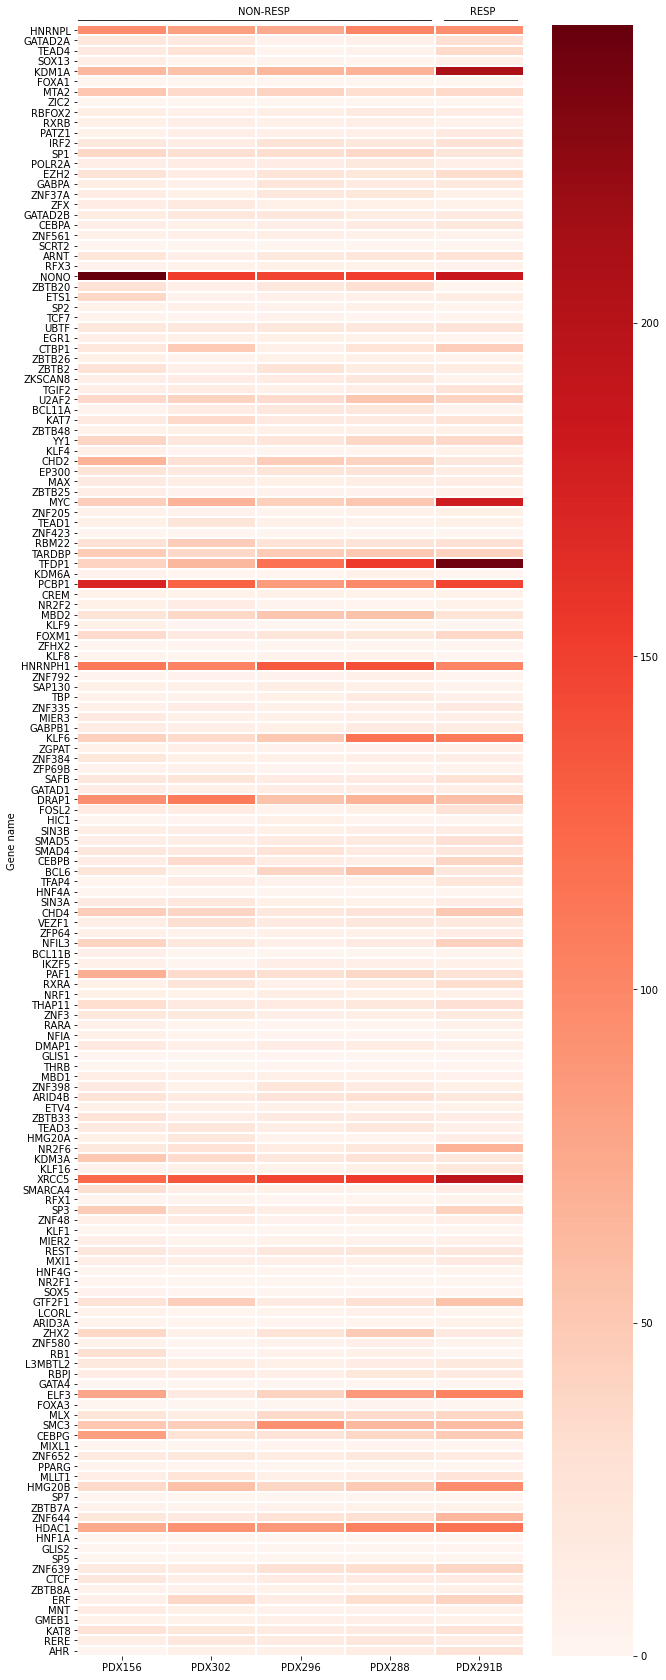

In [127]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=10,y=30) #not normalized

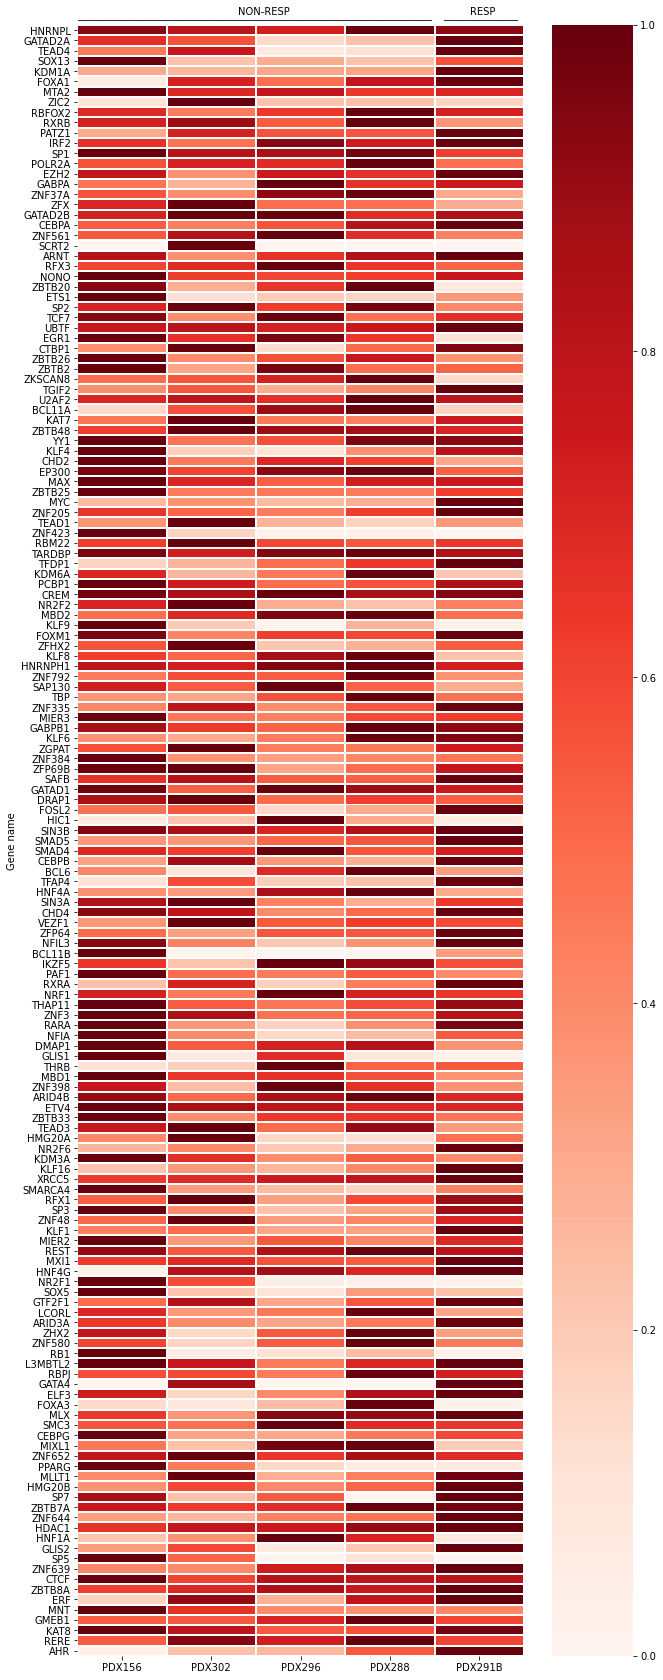

In [128]:
heatmap(matrix_df,x=10,y=30,norm=True) #not normalized

Text(0.5, 1.0, 'FGFR2')

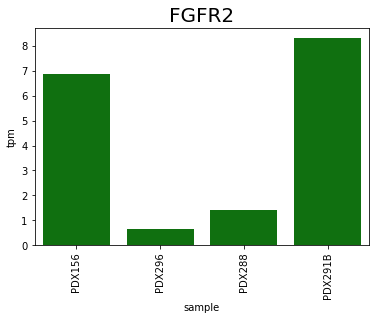

In [58]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(fgfrs)].groupby(['sample','Gene name'],as_index=False).max()

data = fgfr_df[fgfr_df['Gene name']=='FGFR2']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR2',size=20)

Text(0.5, 1.0, 'KDM1A')

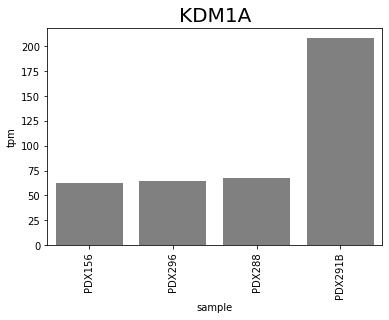

In [59]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()

data = max_df[max_df['Gene name']=='KDM1A']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='grey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('KDM1A',size=20)

Text(0.5, 1.0, 'TFDP1')

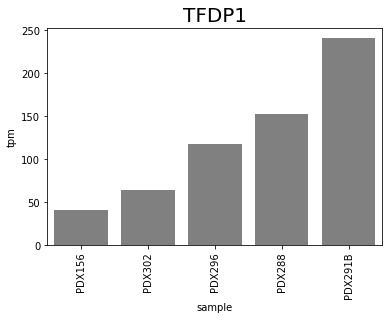

In [125]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()

data = max_df[max_df['Gene name']=='TFDP1']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='grey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('TFDP1',size=20)